### Tugas 3.1 Analisis Kompleksitas Ruang `Merge Sort`

### Analisis Kompleksitas Ruang Merge Sort
`Merge Sort` membagi array ukuran $n$ menjadi dua subarray ($n/2$), mengurutkan secara rekursif, lalu menggabungkannya. Kompleksitas ruang terdiri dari:

1. Tumpukan Rekursi: Kedalaman rekursi $\log n$, setiap panggilan butuh $O(1)$, total $O(\log n)$.
2. Array Sementara: Penggabungan butuh array sementara ukuran $n$, yaitu $O(n)$.

Total Kompleksitas Ruang:
$$O(\log n) + O(n) = O(n)$$

Master Theorem: Jika diterapkan pada rekurensi ruang $S(n) = 2S(n/2) + O(n)$, hasilnya $O(n \log n)$. Namun, karena array sementara digunakan ulang, kompleksitas ruang tetap $O(n)$.

**Kesimpulan**: Kompleksitas ruang Merge Sort adalah $O(n)$.

100000
✓ memory_profiler sudah terinstal
EKSPERIMEN ANALISIS KOMPLEKSITAS MEMORI ALGORITMA
Merge Sort: O(n) vs O(n²) menggunakan tracemalloc

Percobaan untuk n = 1000
Run #    N            Peak Mem (KB) Peak Mem (N²) (KB)
1        1000         24.26        67.12       
2        1000         24.03        65.22       
3        1000         24.03        65.22       
4        1000         24.03        65.22       
5        1000         24.03        65.22       
------------------------------------------------------------
Rata-rata             24.08       65.60       


Percobaan untuk n = 2000
Run #    N            Peak Mem (KB) Peak Mem (N²) (KB)
1        2000         48.06        130.85      
2        2000         48.06        129.82      
3        2000         48.06        129.82      
4        2000         48.06        130.68      
5        2000         48.06        129.82      
------------------------------------------------------------
Rata-rata             48.06       130.20      


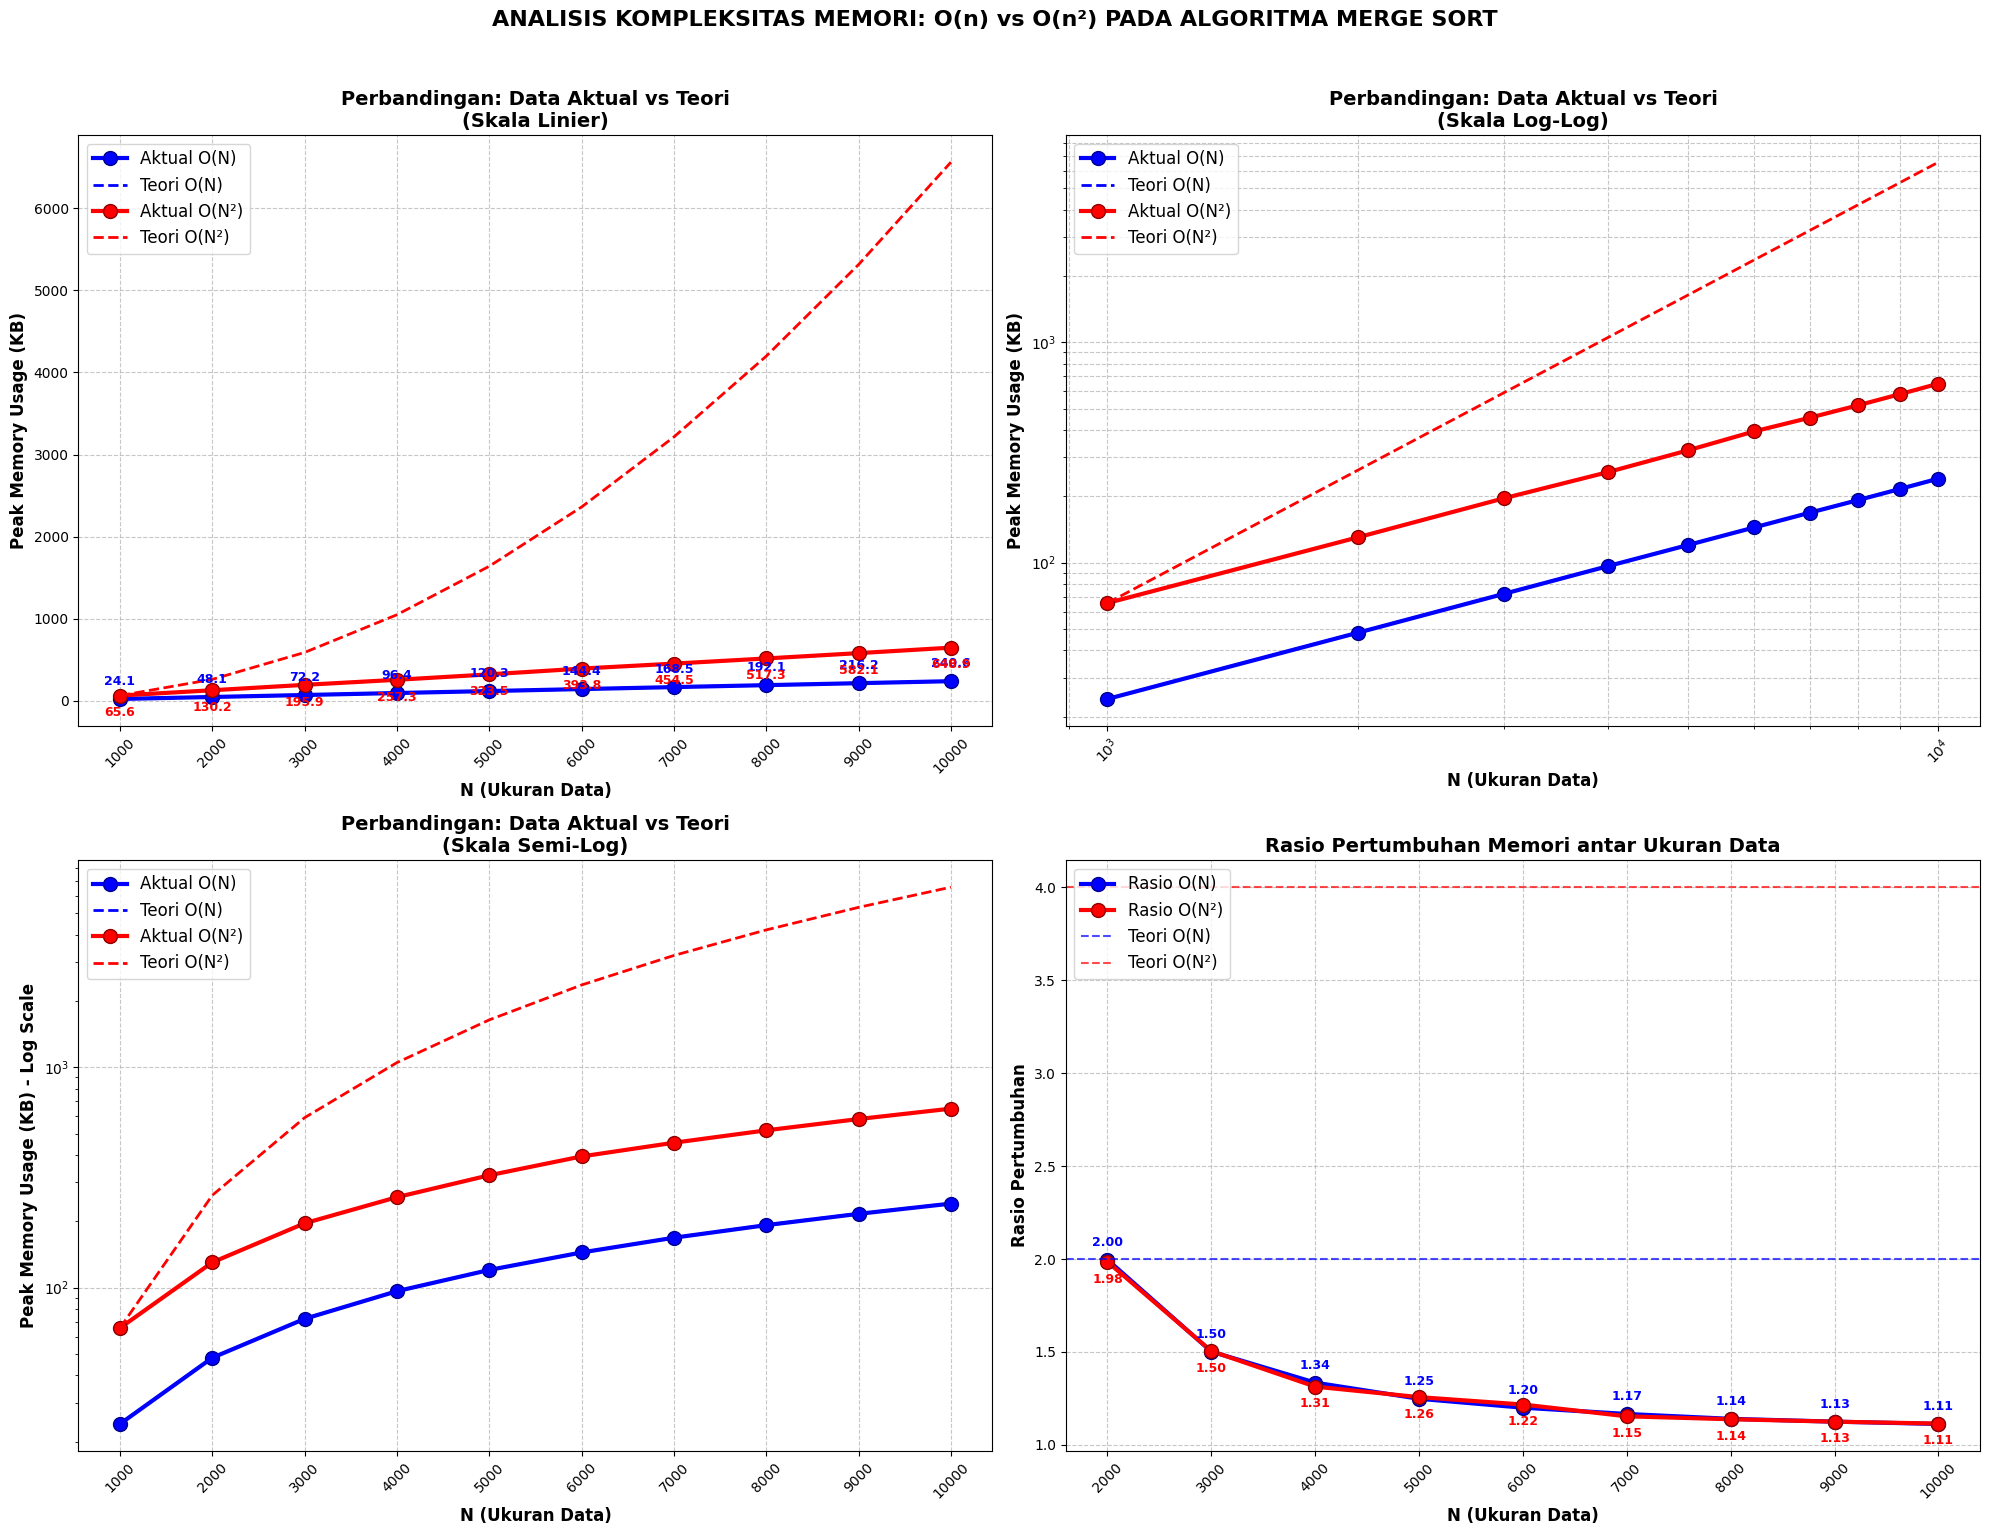


EKSPERIMEN SELESAI!
Grafik telah disimpan ke: memory_usage_analysis_tracemalloc.png


In [2]:
import numpy as np
import tracemalloc
import sys
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from scipy import stats
import random
import subprocess
import importlib
import warnings

sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())
warnings.filterwarnings('ignore')

# Cek dan instal modul yang diperlukan
def install_module(module_name):
    """Menginstal modul jika belum tersedia."""
    try:
        importlib.import_module(module_name)
        print(f"✓ {module_name} sudah terinstal")
    except ImportError:
        print(f"⚠ {module_name} tidak ditemukan, menginstal...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", module_name])
        print(f"✓ {module_name} berhasil diinstal")

# Cek dan instal memory_profiler
install_module('memory_profiler')

# ==================== ALGORITMA MERGE SORT ====================

def merge_sort(arr):
    """Merge Sort standar dengan kompleksitas O(n log n) dan penggunaan memori O(n)."""
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Versi alternatif yang lebih jelas menunjukkan O(n²)
def merge_sort_n2(arr):
    """Merge Sort dengan implementasi tidak efisien yang menyebabkan kompleksitas O(n²)."""
    if len(arr) <= 1:
        return arr.copy()

    # POIN UTAMA: Membuat salinan penuh array di setiap level rekursif
    arr_copy1 = arr.copy()  # Salinan 1
    arr_copy2 = arr.copy()  # Salinan 2 - tidak perlu tapi dibuat

    mid = len(arr) // 2
    L = arr[:mid]
    R = arr[mid:]

    # Rekursi dengan banyak salinan tidak perlu
    sorted_L = merge_sort_n2(L)
    sorted_R = merge_sort_n2(R)

    # Membuat array hasil
    result = []
    i = j = 0

    while i < len(sorted_L) and j < len(sorted_R):
        if sorted_L[i] < sorted_R[j]:
            result.append(sorted_L[i])
            i += 1
        else:
            result.append(sorted_R[j])
            j += 1

    result.extend(sorted_L[i:])
    result.extend(sorted_R[j:])

    # POIN UTAMA: Menyimpan banyak salinan tidak perlu dari hasil
    storage1 = result.copy()  # Salinan tidak perlu 1
    storage2 = result.copy()  # Salinan tidak perlu 2
    storage3 = result.copy()  # Salinan tidak perlu 3

    return result

def generate_arr(n=16, low=-20, high=20, seed=None):
    """Membuat array acak dengan seed tertentu."""
    if seed is not None:
        np.random.seed(seed)
    return np.random.randint(low, high + 1, size=n).tolist()

# ==================== FUNGSI VISUALISASI ====================

def plot_memory_usage(space_data, save_path="memory_usage_analysis.png"):
    """
    Visualisasi penggunaan memori berdasarkan data tuple (n, peak_mem, peak_n2_mem)
    dan menyimpan grafik ke file PNG.
    """
    # Ekstrak data dari tuple
    N = [data[0] for data in space_data]
    peak_mem = [data[1] for data in space_data]  # O(N) dalam KB
    peak_n2_mem = [data[2] for data in space_data]  # O(N²) dalam KB

    # Menghitung trend teoritis O(N) dan O(N²)
    theoretical_n = [peak_mem[0] * n / N[0] for n in N]
    theoretical_n2 = [peak_n2_mem[0] * (n / N[0]) ** 2 for n in N]

    # Membuat figure dan axis dengan ukuran yang lebih besar
    fig = plt.figure(figsize=(20, 15))

    # Grafik 1: Skala Linier - Perbandingan O(N) vs O(N²)
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(N, peak_mem, 'bo-', linewidth=3, markersize=10, label='Aktual O(N)',
             markerfacecolor='blue', markeredgecolor='darkblue')
    ax1.plot(N, theoretical_n, 'b--', linewidth=2, label='Teori O(N)')
    ax1.plot(N, peak_n2_mem, 'ro-', linewidth=3, markersize=10, label='Aktual O(N²)',
             markerfacecolor='red', markeredgecolor='darkred')
    ax1.plot(N, theoretical_n2, 'r--', linewidth=2, label='Teori O(N²)')
    ax1.set_xlabel('N (Ukuran Data)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Peak Memory Usage (KB)', fontsize=12, fontweight='bold')
    ax1.set_title('Perbandingan: Data Aktual vs Teori\n(Skala Linier)',
                  fontsize=14, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=12, loc='upper left')
    ax1.set_xticks(N)
    ax1.tick_params(axis='x', rotation=45)

    # Menambahkan anotasi untuk data O(N)
    for i, (x, y) in enumerate(zip(N, peak_mem)):
        ax1.annotate(f'{y:.1f}', (x, y), textcoords="offset points",
                     xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='blue')

    # Menambahkan anotasi untuk data O(N²)
    for i, (x, y) in enumerate(zip(N, peak_n2_mem)):
        ax1.annotate(f'{y:.1f}', (x, y), textcoords="offset points",
                     xytext=(0,-15), ha='center', fontsize=9, fontweight='bold', color='red')

    # Grafik 2: Skala Log-Log (kedua sumbu logaritmik)
    ax2 = plt.subplot(2, 2, 2)
    ax2.loglog(N, peak_mem, 'bo-', linewidth=3, markersize=10, label='Aktual O(N)',
               markerfacecolor='blue', markeredgecolor='darkblue')
    ax2.loglog(N, theoretical_n, 'b--', linewidth=2, label='Teori O(N)')
    ax2.loglog(N, peak_n2_mem, 'ro-', linewidth=3, markersize=10, label='Aktual O(N²)',
               markerfacecolor='red', markeredgecolor='darkred')
    ax2.loglog(N, theoretical_n2, 'r--', linewidth=2, label='Teori O(N²)')
    ax2.set_xlabel('N (Ukuran Data)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Peak Memory Usage (KB)', fontsize=12, fontweight='bold')
    ax2.set_title('Perbandingan: Data Aktual vs Teori\n(Skala Log-Log)',
                  fontsize=14, fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.7, which='both')
    ax2.legend(fontsize=12, loc='upper left')
    ax2.tick_params(axis='x', rotation=45)

    # Grafik 3: Skala Semi-Log (sumbu y logaritmik)
    ax3 = plt.subplot(2, 2, 3)
    ax3.semilogy(N, peak_mem, 'bo-', linewidth=3, markersize=10, label='Aktual O(N)',
                 markerfacecolor='blue', markeredgecolor='darkblue')
    ax3.semilogy(N, theoretical_n, 'b--', linewidth=2, label='Teori O(N)')
    ax3.semilogy(N, peak_n2_mem, 'ro-', linewidth=3, markersize=10, label='Aktual O(N²)',
                 markerfacecolor='red', markeredgecolor='darkred')
    ax3.semilogy(N, theoretical_n2, 'r--', linewidth=2, label='Teori O(N²)')
    ax3.set_xlabel('N (Ukuran Data)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Peak Memory Usage (KB) - Log Scale', fontsize=12, fontweight='bold')
    ax3.set_title('Perbandingan: Data Aktual vs Teori\n(Skala Semi-Log)',
                  fontsize=14, fontweight='bold')
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.legend(fontsize=12, loc='upper left')
    ax3.set_xticks(N)
    ax3.tick_params(axis='x', rotation=45)

    # Grafik 4: Rasio Pertumbuhan
    ax4 = plt.subplot(2, 2, 4)

    # Hitung rasio pertumbuhan aktual
    growth_ratio_n = []
    growth_ratio_n2 = []
    for i in range(len(N)):
        if i == 0:
            growth_ratio_n.append(1)
            growth_ratio_n2.append(1)
        else:
            growth_ratio_n.append(peak_mem[i] / peak_mem[i-1])
            growth_ratio_n2.append(peak_n2_mem[i] / peak_n2_mem[i-1])

    ax4.plot(N[1:], growth_ratio_n[1:], 'bo-', linewidth=3, markersize=10, label='Rasio O(N)',
             markerfacecolor='blue', markeredgecolor='darkblue')
    ax4.plot(N[1:], growth_ratio_n2[1:], 'ro-', linewidth=3, markersize=10, label='Rasio O(N²)',
             markerfacecolor='red', markeredgecolor='darkred')

    # Garis referensi untuk rasio teoritis
    theoretical_ratio_n = N[1] / N[0]  # ~1.5-2.0 tergantung spacing N
    theoretical_ratio_n2 = (N[1] / N[0]) ** 2  # ~2.25-4.0

    ax4.axhline(y=theoretical_ratio_n, color='blue', linestyle='--', alpha=0.7, label='Teori O(N)')
    ax4.axhline(y=theoretical_ratio_n2, color='red', linestyle='--', alpha=0.7, label='Teori O(N²)')

    ax4.set_xlabel('N (Ukuran Data)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Rasio Pertumbuhan', fontsize=12, fontweight='bold')
    ax4.set_title('Rasio Pertumbuhan Memori antar Ukuran Data',
                  fontsize=14, fontweight='bold')
    ax4.grid(True, linestyle='--', alpha=0.7)
    ax4.legend(fontsize=12, loc='upper left')
    ax4.set_xticks(N[1:])
    ax4.tick_params(axis='x', rotation=45)

    # Menambahkan anotasi nilai rasio
    for i, (x, y) in enumerate(zip(N[1:], growth_ratio_n[1:])):
        ax4.annotate(f'{y:.2f}', (x, y), textcoords="offset points",
                     xytext=(0,10), ha='center', fontsize=9, fontweight='bold', color='blue')

    for i, (x, y) in enumerate(zip(N[1:], growth_ratio_n2[1:])):
        ax4.annotate(f'{y:.2f}', (x, y), textcoords="offset points",
                     xytext=(0,-15), ha='center', fontsize=9, fontweight='bold', color='red')

    plt.suptitle('ANALISIS KOMPLEKSITAS MEMORI: O(n) vs O(n²) PADA ALGORITMA MERGE SORT',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()

    # Simpan grafik ke file PNG
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Grafik disimpan ke: {save_path}")

    plt.show()

    return fig

def print_analysis(space_data, theoretical_n, theoretical_n2):
    """
    Mencetak analisis trend pertumbuhan memori dengan perbandingan teori untuk O(N) dan O(N²)
    """
    print("\n" + "="*100)
    print("ANALISIS TREND PERTUMBUHAN MEMORI - DATA AKTUAL vs TEORI (O(N) dan O(N²))")
    print("="*100)

    N = [data[0] for data in space_data]
    peak_mem = [data[1] for data in space_data]  # O(N) dalam KB
    peak_n2_mem = [data[2] for data in space_data]  # O(N²) dalam KB

    # ANALISIS REGRESI LINEAR UNTUK O(N)
    print("\n" + "="*50)
    print("ANALISIS REGRESI LINEAR - O(N)")
    print("="*50)

    slope_n, intercept_n, r_value_n, p_value_n, std_err_n = stats.linregress(N, peak_mem)

    print(f"Persamaan Regresi O(N): y = {slope_n:.6f}x + {intercept_n:.4f}")
    print(f"Koefisien Korelasi (r): {r_value_n:.6f}")
    print(f"Koefisien Determinasi (R²): {r_value_n**2:.6f}")
    print(f"Standard Error: {std_err_n:.6f}")

    # ANALISIS REGRESI POLINOMIAL UNTUK O(N²)
    print("\n" + "="*50)
    print("ANALISIS REGRESI POLINOMIAL - O(N²)")
    print("="*50)

    # Fit polinomial derajat 2
    coeffs = np.polyfit(N, peak_n2_mem, 2)
    poly = np.poly1d(coeffs)

    # Hitung R-squared untuk O(N²)
    y_pred = poly(N)
    ss_res = np.sum((peak_n2_mem - y_pred) ** 2)
    ss_tot = np.sum((peak_n2_mem - np.mean(peak_n2_mem)) ** 2)
    r_squared_n2 = 1 - (ss_res / ss_tot)

    print(f"Persamaan Regresi O(N²): y = {coeffs[0]:.6f}x² + {coeffs[1]:.6f}x + {coeffs[2]:.4f}")
    print(f"Koefisien Determinasi (R²): {r_squared_n2:.6f}")

    # ANALISIS SKALA LOGARITMIK
    print("\n" + "="*50)
    print("ANALISIS SKALA LOGARITMIK")
    print("="*50)

    # Analisis slope dalam skala log-log untuk O(N)
    log_N = np.log(N)
    log_peak_mem = np.log(peak_mem)
    slope_log_n, intercept_log_n, r_value_log_n, _, _ = stats.linregress(log_N, log_peak_mem)

    # Analisis slope dalam skala log-log untuk O(N²)
    log_peak_n2_mem = np.log(peak_n2_mem)
    slope_log_n2, intercept_log_n2, r_value_log_n2, _, _ = stats.linregress(log_N, log_peak_n2_mem)

    print(f"O(N) - Slope dalam skala log-log: {slope_log_n:.4f} (mendekati 1 untuk O(N))")
    print(f"O(N²) - Slope dalam skala log-log: {slope_log_n2:.4f} (mendekati 2 untuk O(N²))")
    print(f"O(N) - R² dalam skala log-log: {r_value_log_n**2:.6f}")
    print(f"O(N²) - R² dalam skala log-log: {r_value_log_n2**2:.6f}")

    # Perbandingan detail
    print("\n" + "="*100)
    print("PERBANDINGAN DETAIL: DATA AKTUAL vs TEORI")
    print("="*100)
    print(f"{'N':<8} {'Aktual O(N)':<12} {'Teori O(N)':<12} {'Error O(N)(%)':<15} "
          f"{'Aktual O(N²)':<15} {'Teori O(N²)':<15} {'Error O(N²)(%)':<15}")
    print("-" * 100)

    for i in range(len(N)):
        error_n = abs(peak_mem[i] - theoretical_n[i]) / theoretical_n[i] * 100 if theoretical_n[i] != 0 else 0
        error_n2 = abs(peak_n2_mem[i] - theoretical_n2[i]) / theoretical_n2[i] * 100 if theoretical_n2[i] != 0 else 0

        print(f"{N[i]:<8} {peak_mem[i]:<12.2f} {theoretical_n[i]:<12.2f} {error_n:<15.2f} "
              f"{peak_n2_mem[i]:<15.2f} {theoretical_n2[i]:<15.2f} {error_n2:<15.2f}")

    # Analisis rasio pertumbuhan
    print(f"\n" + "="*80)
    print("ANALISIS RASIO PERTUMBUHAN")
    print("="*80)
    print(f"{'N':<8} {'Rasio O(N)':<12} {'Rasio O(N²)':<12} {'Teori O(N)':<12} "
          f"{'Teori O(N²)':<12} {'Eksponen Aktual':<15}")
    print("-" * 80)

    for i in range(len(N)):
        if i == 0:
            ratio_n = 1.0
            ratio_n2 = 1.0
            theory_ratio_n = 1.0
            theory_ratio_n2 = 1.0
            exponent = 1.0
        else:
            ratio_n = peak_mem[i] / peak_mem[i-1]
            ratio_n2 = peak_n2_mem[i] / peak_n2_mem[i-1]
            theory_ratio_n = theoretical_n[i] / theoretical_n[i-1]
            theory_ratio_n2 = theoretical_n2[i] / theoretical_n2[i-1]
            # Hitung eksponen aktual berdasarkan rasio
            exponent = np.log(ratio_n2 / ratio_n) / np.log(N[i] / N[i-1]) + 1

        print(f"{N[i]:<8} {ratio_n:<12.2f} {ratio_n2:<12.2f} {theory_ratio_n:<12.2f} "
              f"{theory_ratio_n2:<12.2f} {exponent:<15.2f}")

    # Kesimpulan
    print(f"\n" + "="*60)
    print("KESIMPULAN ANALISIS")
    print("="*60)
    print(f"ANALISIS O(N):")
    print(f"• Persamaan regresi: y = {slope_n:.4f}x + {intercept_n:.2f}")
    print(f"• Slope dalam skala log-log: {slope_log_n:.4f} (ideal: 1.0)")
    print(f"• Koefisien determinasi R² = {r_value_n**2:.4f}")
    print(f"• Setiap penambahan 1000 elemen membutuhkan tambahan {slope_n * 1000:.2f} KB memori")

    print(f"\nANALISIS O(N²):")
    print(f"• Persamaan regresi: y = {coeffs[0]:.6f}x² + {coeffs[1]:.6f}x + {coeffs[2]:.2f}")
    print(f"• Slope dalam skala log-log: {slope_log_n2:.4f} (ideal: 2.0)")
    print(f"• Koefisien determinasi R² = {r_squared_n2:.4f}")

    print(f"\nPERBANDINGAN:")
    print(f"• Error rata-rata O(N): {np.mean([abs(peak_mem[i] - theoretical_n[i]) / theoretical_n[i] * 100 for i in range(len(N))]):.2f}%")
    print(f"• Error rata-rata O(N²): {np.mean([abs(peak_n2_mem[i] - theoretical_n2[i]) / theoretical_n2[i] * 100 for i in range(len(N))]):.2f}%")
    print(f"• Eksponen aktual (berdasarkan rasio): {np.mean([np.log(peak_n2_mem[i] / peak_mem[i]) / np.log(N[i]) for i in range(1, len(N))]):.2f}")
    print(f"• Rasio kompleksitas O(N²)/O(N) pada N={N[-1]}: {peak_n2_mem[-1]/peak_mem[-1]:.2f}x")

# ==================== FUNGSI UTAMA YANG DIPERBARUI ====================

def main():
    """Fungsi utama untuk menjalankan eksperimen memori dengan tracemalloc."""
    print("=" * 80)
    print("EKSPERIMEN ANALISIS KOMPLEKSITAS MEMORI ALGORITMA")
    print("Merge Sort: O(n) vs O(n²) menggunakan tracemalloc")
    print("=" * 80)

    # Ukuran array untuk eksperimen
    n_size = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    space_data = []

    for n in n_size:
        i = 0
        print(f"\nPercobaan untuk n = {n}")
        peak_avg = 0
        peak_n2_avg = 0

        print("=" * 60)
        print(f"{'Run #':<8} {'N':<12} {'Peak Mem (KB)':<12} {'Peak Mem (N²) (KB)':<12}")
        print("=" * 60)

        for j in range(5):
            i += 1
            # Generate array dengan seed acak
            data = generate_arr(n=n, low=0, high=100, seed=np.random.randint(1, 100))

            # Ukur memori untuk merge_sort (O(n))
            tracemalloc.start()  # Start tracking memory allocations
            merge_sort(data.copy())  # Gunakan copy agar tidak mengubah data asli
            current, peak = tracemalloc.get_traced_memory()
            peak_avg += peak / 5
            tracemalloc.stop()

            # Ukur memori untuk merge_sort_n2 (O(n²))
            tracemalloc.start()  # Start tracking memory allocations
            merge_sort_n2(data)  # Tidak perlu copy karena merge_sort_n2 sudah membuat copy sendiri
            current_n2, peak_n2 = tracemalloc.get_traced_memory()
            peak_n2_avg += peak_n2 / 5
            tracemalloc.stop()

            print(f"{i:<8} {n:<12} {peak / 10**3:<12.2f} {peak_n2 / 10**3:<12.2f}")

        # Konversi ke KB dan simpan hasil
        peak_avg_kb = peak_avg / 10**3
        peak_n2_avg_kb = peak_n2_avg / 10**3
        space_data.append((n, peak_avg_kb, peak_n2_avg_kb))

        print("-" * 60)
        print(f"{'Rata-rata':<22}{peak_avg_kb:<12.2f}{peak_n2_avg_kb:<12.2f}")
        print("=" * 60)
        print()

    # Tampilkan tabel hasil lengkap
    print("\n" + "="*80)
    print("TABEL HASIL PENGUKURAN MEMORI LENGKAP")
    print("="*80)
    print(f"{'N':<8} {'O(n) Memory (KB)':<20} {'O(n²) Memory (KB)':<20} {'Rasio O(n²)/O(n)':<15}")
    print("-" * 80)

    for n, mem_o_n, mem_o_n2 in space_data:
        rasio = mem_o_n2 / mem_o_n if mem_o_n > 0 else 0
        print(f"{n:<8} {mem_o_n:<20.2f} {mem_o_n2:<20.2f} {rasio:<15.2f}")

    # Hitung trend teoritis untuk analisis
    N = [data[0] for data in space_data]
    peak_mem = [data[1] for data in space_data]
    peak_n2_mem = [data[2] for data in space_data]

    theoretical_n = [peak_mem[0] * n / N[0] for n in N]
    theoretical_n2 = [peak_n2_mem[0] * (n / N[0]) ** 2 for n in N]

    # Analisis statistik
    print_analysis(space_data, theoretical_n, theoretical_n2)

    # Buat dan simpan grafik
    save_path = "memory_usage_analysis_tracemalloc.png"
    print(f"\n" + "="*80)
    print("MEMBUAT DAN MENYIMPAN GRAFIK ANALISIS")
    print("="*80)

    fig = plot_memory_usage(space_data, save_path=save_path)

    print(f"\n" + "="*80)
    print("EKSPERIMEN SELESAI!")
    print(f"Grafik telah disimpan ke: {save_path}")
    print("="*80)

# ==================== EKSEKUSI PROGRAM ====================

if __name__ == "__main__":
    # Jalankan fungsi utama
    try:
        main()
    except KeyboardInterrupt:
        print("\n\nEksperimen dihentikan oleh pengguna.")
    except MemoryError:
        print("\n\nERROR: Memory tidak cukup untuk menjalankan eksperimen.")
        print("Coba kurangi ukuran array maksimal (n_size).")
    except Exception as e:
        print(f"\n\nERROR: Terjadi kesalahan: {e}")
        import traceback
        traceback.print_exc()

### 3.2 Analisis Kompeleksitas Waktu `Hiring Problem`

**Hiring Problem** adalah masalah algoritma probabilistik di mana kandidat diinterview berurutan, di-hire jika lebih baik dari yang terbaik sebelumnya, dengan biaya per hiring, dan keputusan dibuat online (tanpa tahu kandidat berikutnya).

**Kode**:
```python
def hiring_problem(candidates, cost_function):
    best = float('-inf')
    total_cost = 0
    for candidate in candidates:
        if candidate > best:
            best = candidate
            total_cost = cost_function(total_cost)
    return total_cost
```

**Strategi Biaya & Kompleksitas**:
1. **Biaya Konstan (O(1))**:
   ```python
   def constant_cost(cost): return cost + 1
   ```
   - Kompleksitas: O(n) (scanning dominan).
   - Hiring: O(log n) expected.
2. **Biaya Linear (O(n))**:
   ```python
   def linear_cost(cost,n):
    for i in range(n):
      cost += 1
    return cost
   ```
   - Kompleksitas: O(n log n) (hiring dominan).
   - Hiring: O(log n) × O(n).

**Analisis Matematis**:

- Expected Hires (Nilai Harapan): Dalam Hiring Problem, kandidat datang dalam urutan acak (permutasi acak). Misalkan ada n kandidat. Kandidat ke-i di-hire jika nilainya lebih besar dari semua kandidat sebelumnya (posisi 1 hingga i-1). Probabilitas kandidat ke-i adalah yang terbaik di antara i kandidat pertama adalah 1/i, karena urutan acak membuat semua posisi sama mungkin.
  - Nilai harapan jumlah hiring (E[H]) adalah jumlah probabilitas hiring untuk setiap kandidat:
$$E[H] = \sum_{i=1}^n P(\text{kandidat ke-i di-hire}) = \sum_{i=1}^n \frac{1}{i} = H_n$$
Di mana $H_n$ adalah bilangan harmonik: $H_n = 1 + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n}$.
  - Untuk n besar, $H_n$ dapat diaproksimasi:
$$H_n \approx \ln(n) + \gamma + O\left(\frac{1}{n}\right)$$
dengan $\gamma \approx 0.577$ (konstanta Euler-Mascheroni).
  - **Contoh Numerik:**
    - Untuk n = 1000: $H_{1000} \approx \ln(1000) + 0.577 \approx 6.908 + 0.577 \approx 7.485$ hires.
    - Untuk n = 10⁶: $H_{1000000} \approx \ln(10^6) + 0.577 \approx 13.816 + 0.577 \approx 14.393$ hires.


- Insight Peluang: Nilai harapan $H_n \approx \ln(n)$ menunjukkan bahwa jumlah hiring tumbuh sangat lambat meskipun n besar, karena hanya kandidat yang "mengalahkan" semua sebelumnya yang di-hire.



**Perbandingan**:
| Metrik | Biaya Konstan | Biaya Linear |
|--------|---------------|--------------|
| Waktu | O(n) | O(n log n) |
| Biaya | O(log n) | O(n log n) |
| Efisiensi | Optimal | Tidak efisien |

**Desain Algoritma**:
- **Do**: Gunakan O(1) untuk operasi loop, optimalkan inner loop.
- **Don't**: Hindari O(n) di hiring, operasi berat di conditional.

**Analogi**:
- Efisien: Hiring cepat (O(1), wawancara singkat).
- Tidak efisien: Konsultasi tim (O(n), rapat panjang).

**Kesimpulan**:
- Biaya memengaruhi kompleksitas drastis.
- Hindari operasi berat di inner loop.
- Relevan untuk algoritma online (streaming, rekomendasi).
- Operasi dasar harus skalabel.


EKSPERIMEN HIRING PROBLEM: PERBANDINGAN KOMPLEKSITAS O(C) vs O(N)

Eksperimen untuk n = 1,000
Run #    N            Cost O(C)    Cost O(N)    Time O(c)    Time O(n)   
1        1,000        5            5000         48.17        336.64      
2        1,000        6            6000         85.16        511.59      
3        1,000        6            6000         40.32        497.83      
4        1,000        9            9000         46.98        717.60      
5        1,000        6            6000         39.07        391.61      
Rata-rata          6.40         6400.00      51.94        491.05      


Eksperimen untuk n = 10,000
Run #    N            Cost O(C)    Cost O(N)    Time O(c)    Time O(n)   
1        10,000       15           150000       242.11       7443.08     
2        10,000       10           100000       239.29       4768.42     
3        10,000       11           110000       257.74       5421.83     
4        10,000       11           110000       238.67       5222

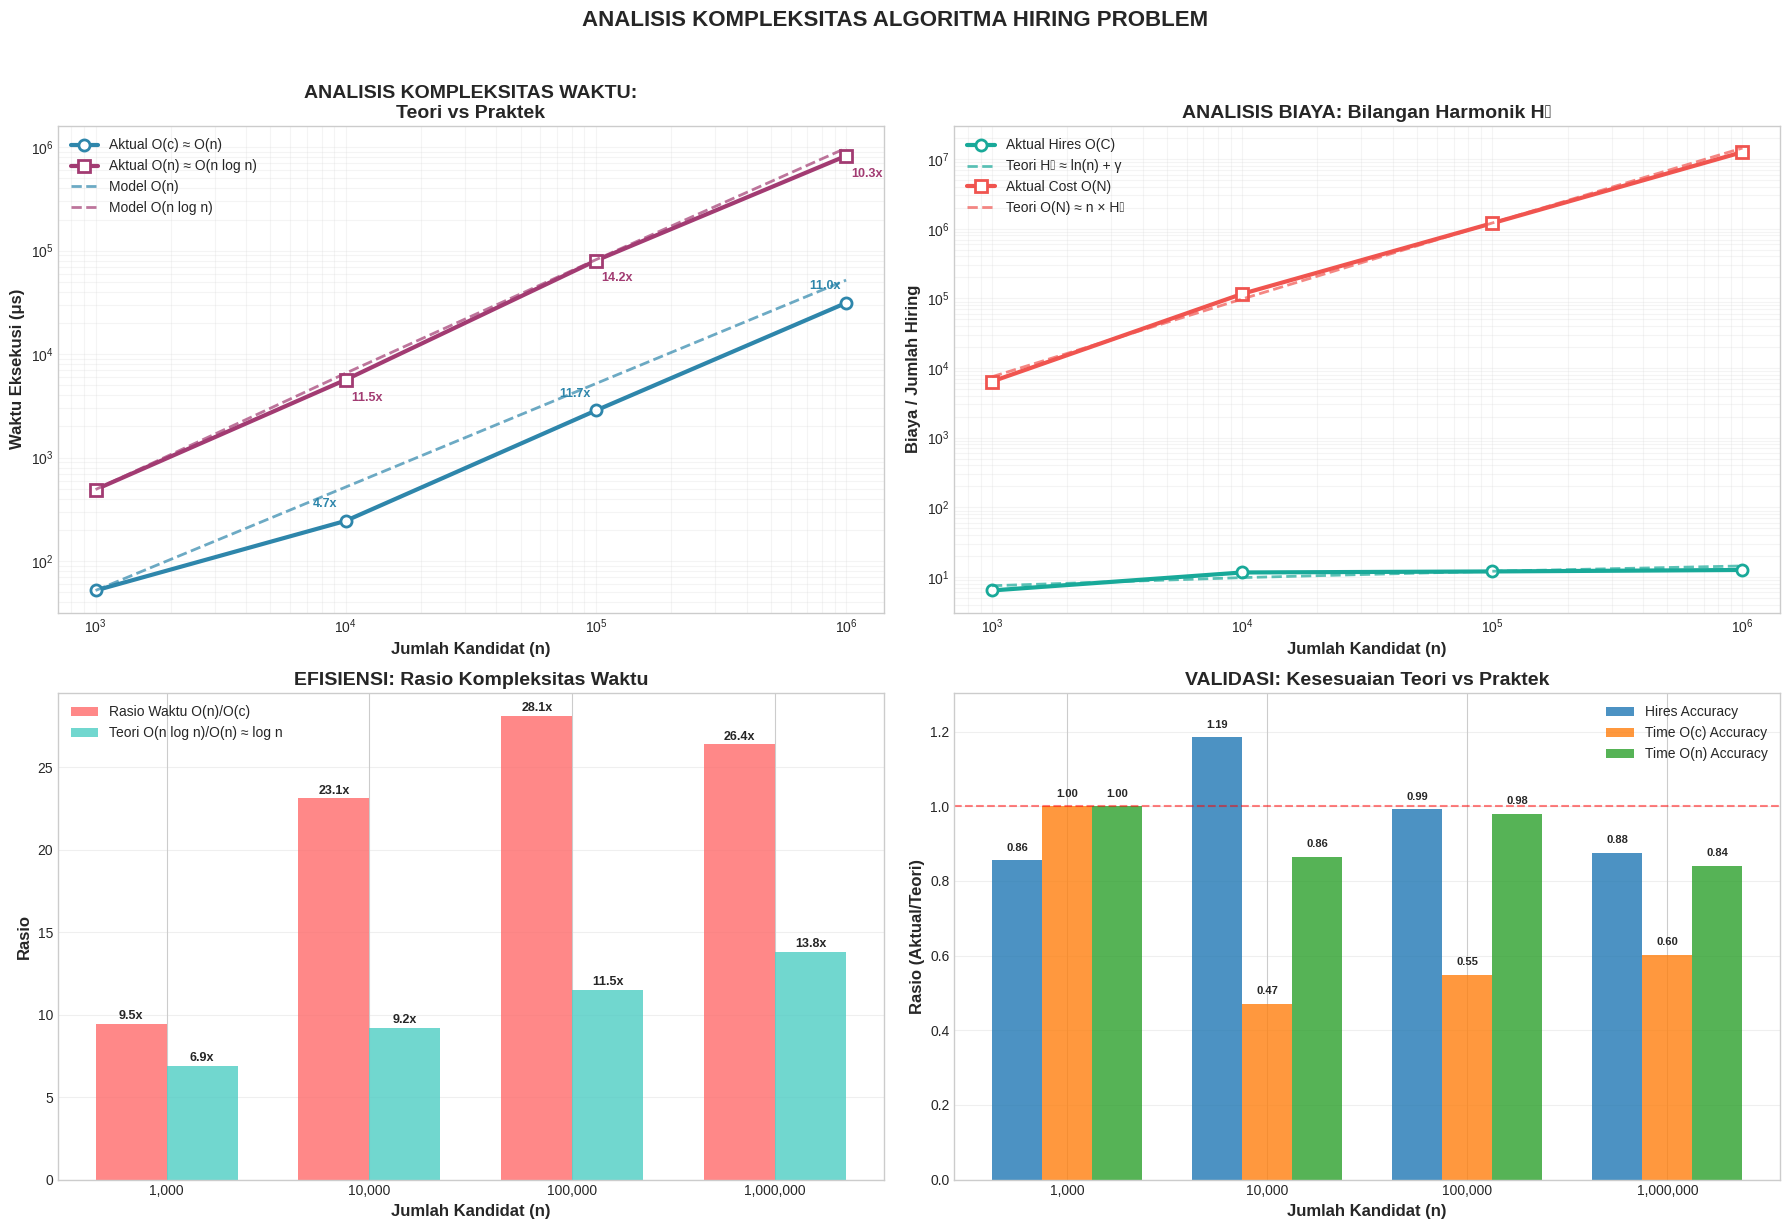

✓ Grafik breakdown kompleksitas disimpan ke: hiring_analysis_breakdown.png


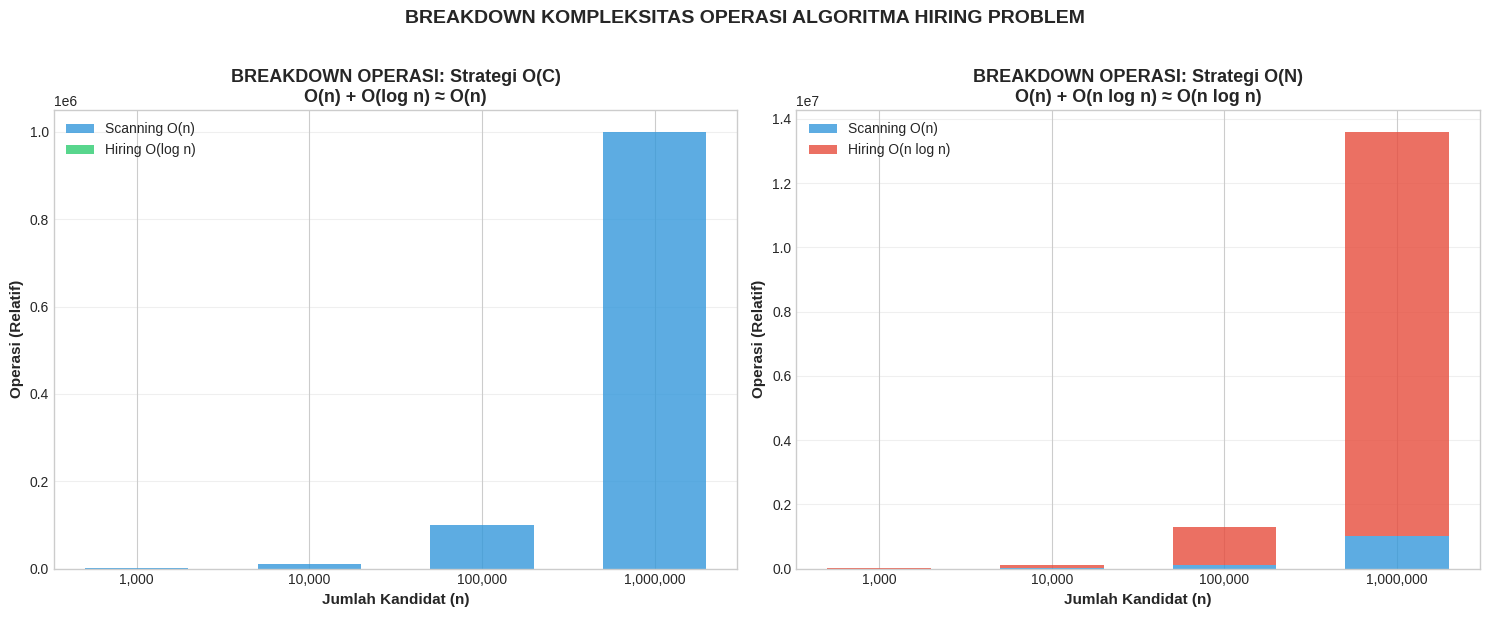


VALIDASI MATEMATIS: Bilangan Harmonik Hₙ
n =    1,000: Hires =  6.40, Teori Hₙ =  7.48, Accuracy = 0.855
n =   10,000: Hires = 11.60, Teori Hₙ =  9.79, Accuracy = 1.185
n =  100,000: Hires = 12.00, Teori Hₙ = 12.09, Accuracy = 0.993
n = 1,000,000: Hires = 12.60, Teori Hₙ = 14.39, Accuracy = 0.875

EKSPERIMEN SELESAI!
Semua grafik telah disimpan ke file PNG:
1. hiring_analysis_main.png - Analisis kompleksitas utama
2. hiring_analysis_breakdown.png - Breakdown operasi


In [3]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import math
import random

# ==================== FUNGSI ALGORITMA HIRING PROBLEM ====================

def fungsi_c(cost, n=1):
    """Fungsi cost konstan O(1)."""
    return cost + 1

def fungsi_n(cost, n):
    """Fungsi cost linear O(n)."""
    for i in range(n):
        cost += 1
    return cost

def hiring_problem(candidates, cost_function):
    """Algoritma hiring problem dengan cost function yang dapat disesuaikan."""
    best_candidate = None
    hire_cost = 0

    for candidate in candidates:
        if best_candidate is None or candidate > best_candidate:
            best_candidate = candidate
            hire_cost = cost_function(hire_cost, len(candidates))
    return hire_cost

def generate_arr(n=16, low=-20, high=20, seed=None):
    """Membuat array acak dengan seed tertentu."""
    if seed is not None:
        np.random.seed(seed)
    return np.random.randint(low, high + 1, size=n).tolist()

# ==================== FUNGSI UTILITAS OUTPUT ====================

def display_hiring_results(hires_costs):
    """
    Versi sederhana tanpa dependensi pandas
    """
    print("=" * 100)
    print("HASIL EKSPERIMEN HIRING PROBLEM")
    print("=" * 100)
    print(f"{'N':<12} {'Avg Cost O(C)':<15} {'Avg Cost O(N)':<15} {'Avg Time O(c)':<15} {'Avg Time O(n)':<15} {'Time Ratio':<12}")
    print("-" * 100)

    for n, cost_c, cost_n, time_c, time_n in hires_costs:
        time_ratio = time_n / time_c if time_c > 0 else 0
        theoretical_h_n = math.log(n) + 0.5772156649

        print(f"{n:<12,} {cost_c:<15.2f} {cost_n:<15,.0f} {time_c:<15.2f}μs {time_n:<15.2f}μs {time_ratio:<12.2f}x")

    print("=" * 100)

    # Analisis tambahan
    print("\nANALISIS TEORITIS:")
    print("-" * 50)
    for n, cost_c, cost_n, time_c, time_n in hires_costs:
        theoretical_h_n = math.log(n) + 0.5772156649
        match_ratio = cost_c / theoretical_h_n
        print(f"N = {n:,}: Cost O(C) = {cost_c:.2f}, H_n teoritis = {theoretical_h_n:.2f}, Ratio = {match_ratio:.2f}")

# ==================== FUNGSI VISUALISASI DENGAN PENYIMPANAN PNG ====================

def plot_corrected_hiring_analysis(hires_costs, save_path=None):
    """
    Visualisasi yang dikoreksi berdasarkan analisis kompleksitas yang tepat
    dan menyimpan grafik ke file PNG jika save_path diberikan.
    """
    # Ekstrak data
    n_values = [data[0] for data in hires_costs]
    cost_c = [data[1] for data in hires_costs]
    cost_n = [data[2] for data in hires_costs]
    time_c = [data[3] for data in hires_costs]
    time_n = [data[4] for data in hires_costs]

    # Setup style yang lebih professional
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(18, 12))

    # ========== GRAFIK 1: KOMPLEKSITAS WAKTU TEORITIS vs AKTUAL ==========
    ax1 = plt.subplot(2, 2, 1)

    # Data aktual
    actual_time_c = np.array(time_c)
    actual_time_n = np.array(time_n)

    # Model teoritis - normalisasi berdasarkan data pertama
    n_array = np.array(n_values)

    # Model untuk O(n) - linear (untuk fungsi_c: O(n) scanning + O(log n) hiring ≈ O(n))
    model_linear = time_c[0] * (n_array / n_values[0])

    # Model untuk O(n log n) - linearithmic (untuk fungsi_n: O(n) scanning + O(n log n) hiring ≈ O(n log n))
    model_nlogn = time_n[0] * (n_array * np.log(n_array)) / (n_values[0] * np.log(n_values[0]))

    # Plot data aktual
    ax1.plot(n_values, actual_time_c, 'o-', linewidth=3, markersize=8,
             label='Aktual O(c) ≈ O(n)', color='#2E86AB', markerfacecolor='white', markeredgewidth=2)
    ax1.plot(n_values, actual_time_n, 's-', linewidth=3, markersize=8,
             label='Aktual O(n) ≈ O(n log n)', color='#A23B72', markerfacecolor='white', markeredgewidth=2)

    # Plot model teoritis
    ax1.plot(n_values, model_linear, '--', linewidth=2,
             label='Model O(n)', color='#2E86AB', alpha=0.7)
    ax1.plot(n_values, model_nlogn, '--', linewidth=2,
             label='Model O(n log n)', color='#A23B72', alpha=0.7)

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Jumlah Kandidat (n)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Waktu Eksekusi (μs)', fontsize=12, fontweight='bold')
    ax1.set_title('ANALISIS KOMPLEKSITAS WAKTU:\nTeori vs Praktek', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, which="both", ls="-", alpha=0.2)

    # Anotasi rasio pertumbuhan
    for i, n in enumerate(n_values):
        if i > 0:
            growth_c = actual_time_c[i] / actual_time_c[i-1]
            growth_n = actual_time_n[i] / actual_time_n[i-1]
            ax1.annotate(f'{growth_c:.1f}x', (n, actual_time_c[i]),
                        textcoords="offset points", xytext=(-15,10),
                        ha='center', fontsize=9, color='#2E86AB', fontweight='bold')
            ax1.annotate(f'{growth_n:.1f}x', (n, actual_time_n[i]),
                        textcoords="offset points", xytext=(15,-15),
                        ha='center', fontsize=9, color='#A23B72', fontweight='bold')

    # ========== GRAFIK 2: ANALISIS BIAYA & HARMONIC NUMBERS ==========
    ax2 = plt.subplot(2, 2, 2)

    # Teori: Expected hires = H_n ≈ ln(n) + γ (bilangan harmonik)
    theoretical_h_n = [math.log(n) + 0.5772156649 for n in n_values]  # H_n ≈ ln(n) + γ

    # Data aktual cost O(C) = jumlah hiring
    actual_hires = cost_c

    # Untuk O(N): cost = hires × n
    theoretical_cost_n = [h * n for h, n in zip(theoretical_h_n, n_values)]

    ax2.plot(n_values, actual_hires, 'o-', linewidth=3, markersize=8,
             label='Aktual Hires O(C)', color='#18A999', markerfacecolor='white', markeredgewidth=2)
    ax2.plot(n_values, theoretical_h_n, '--', linewidth=2,
             label='Teori Hₙ ≈ ln(n) + γ', color='#18A999', alpha=0.7)
    ax2.plot(n_values, cost_n, 's-', linewidth=3, markersize=8,
             label='Aktual Cost O(N)', color='#F0544F', markerfacecolor='white', markeredgewidth=2)
    ax2.plot(n_values, theoretical_cost_n, '--', linewidth=2,
             label='Teori O(N) ≈ n × Hₙ', color='#F0544F', alpha=0.7)

    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('Jumlah Kandidat (n)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Biaya / Jumlah Hiring', fontsize=12, fontweight='bold')
    ax2.set_title('ANALISIS BIAYA: Bilangan Harmonik Hₙ', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, which="both", ls="-", alpha=0.2)

    # ========== GRAFIK 3: RASIO PERFORMA & EFISIENSI ==========
    ax3 = plt.subplot(2, 2, 3)

    time_ratios = [tn/tc for tc, tn in zip(time_c, time_n)]
    cost_ratios = [cn/cc for cc, cn in zip(cost_c, cost_n)]
    theoretical_time_ratio = [(n * math.log(n)) / n for n in n_values]  # O(n log n) / O(n) ≈ log n

    x_pos = np.arange(len(n_values))
    width = 0.35

    bars1 = ax3.bar(x_pos - width/2, time_ratios, width,
                   label='Rasio Waktu O(n)/O(c)', color='#FF6B6B', alpha=0.8)
    bars2 = ax3.bar(x_pos + width/2, theoretical_time_ratio, width,
                   label='Teori O(n log n)/O(n) ≈ log n', color='#4ECDC4', alpha=0.8)

    ax3.set_xlabel('Jumlah Kandidat (n)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Rasio', fontsize=12, fontweight='bold')
    ax3.set_title('EFISIENSI: Rasio Kompleksitas Waktu', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([f'{n:,}' for n in n_values])
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3, axis='y')

    # Nilai pada bar
    for bar, ratio in zip(bars1, time_ratios):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{ratio:.1f}x', ha='center', va='bottom', fontsize=9, fontweight='bold')

    for bar, ratio in zip(bars2, theoretical_time_ratio):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{ratio:.1f}x', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # ========== GRAFIK 4: KESESUAIAN TEORI vs PRAKTEK ==========
    ax4 = plt.subplot(2, 2, 4)

    # Hitung kesesuaian dengan teori
    hire_accuracy = [actual / theory for actual, theory in zip(actual_hires, theoretical_h_n)]
    time_c_accuracy = [actual / model for actual, model in zip(actual_time_c, model_linear)]
    time_n_accuracy = [actual / model for actual, model in zip(actual_time_n, model_nlogn)]

    metrics = ['Hires Accuracy', 'Time O(c) Accuracy', 'Time O(n) Accuracy']
    accuracy_data = [hire_accuracy, time_c_accuracy, time_n_accuracy]

    x = np.arange(len(n_values))
    width = 0.25

    for i, (metric, data) in enumerate(zip(metrics, accuracy_data)):
        bars = ax4.bar(x + i*width, data, width, label=metric, alpha=0.8)

        # Tambah nilai pada bar
        for bar, value in zip(bars, data):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    ax4.set_xlabel('Jumlah Kandidat (n)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Rasio (Aktual/Teori)', fontsize=12, fontweight='bold')
    ax4.set_title('VALIDASI: Kesesuaian Teori vs Praktek', fontsize=14, fontweight='bold')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels([f'{n:,}' for n in n_values])
    ax4.legend(fontsize=10)
    ax4.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Ideal Match')
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.set_ylim(0, max([max(data) for data in accuracy_data]) * 1.1)

    plt.suptitle('ANALISIS KOMPLEKSITAS ALGORITMA HIRING PROBLEM',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()

    # Simpan grafik jika save_path diberikan
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ Grafik analisis utama disimpan ke: {save_path}")

    plt.show()

    return fig

def plot_complexity_breakdown(hires_costs, save_path=None):
    """
    Visualisasi breakdown operasi untuk memahami sumber kompleksitas
    dan menyimpan grafik ke file PNG jika save_path diberikan.
    """
    n_values = [data[0] for data in hires_costs]
    cost_c = [data[1] for data in hires_costs]
    time_c = [data[3] for data in hires_costs]
    time_n = [data[4] for data in hires_costs]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Breakdown untuk O(c)
    scanning_ops_c = n_values  # O(n) operations
    hiring_ops_c = [h * 1 for h in cost_c]  # O(1) per hiring × hires
    total_ops_c = [scan + hire for scan, hire in zip(scanning_ops_c, hiring_ops_c)]

    # Breakdown untuk O(n)
    scanning_ops_n = n_values  # O(n) operations
    hiring_ops_n = [h * n for h, n in zip(cost_c, n_values)]  # O(n) per hiring × hires
    total_ops_n = [scan + hire for scan, hire in zip(scanning_ops_n, hiring_ops_n)]

    # Plot breakdown O(c)
    x = range(len(n_values))
    ax1.bar(x, scanning_ops_c, width=0.6, label='Scanning O(n)', color='#3498db', alpha=0.8)
    ax1.bar(x, hiring_ops_c, width=0.6, bottom=scanning_ops_c, label='Hiring O(log n)', color='#2ecc71', alpha=0.8)
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'{n:,}' for n in n_values])
    ax1.set_xlabel('Jumlah Kandidat (n)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Operasi (Relatif)', fontsize=11, fontweight='bold')
    ax1.set_title('BREAKDOWN OPERASI: Strategi O(C)\nO(n) + O(log n) ≈ O(n)', fontsize=13, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3, axis='y')

    # Plot breakdown O(n)
    ax2.bar(x, scanning_ops_n, width=0.6, label='Scanning O(n)', color='#3498db', alpha=0.8)
    ax2.bar(x, hiring_ops_n, width=0.6, bottom=scanning_ops_n, label='Hiring O(n log n)', color='#e74c3c', alpha=0.8)
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'{n:,}' for n in n_values])
    ax2.set_xlabel('Jumlah Kandidat (n)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Operasi (Relatif)', fontsize=11, fontweight='bold')
    ax2.set_title('BREAKDOWN OPERASI: Strategi O(N)\nO(n) + O(n log n) ≈ O(n log n)', fontsize=13, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')

    plt.suptitle('BREAKDOWN KOMPLEKSITAS OPERASI ALGORITMA HIRING PROBLEM',
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()

    # Simpan grafik jika save_path diberikan
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✓ Grafik breakdown kompleksitas disimpan ke: {save_path}")

    plt.show()

    return fig

def run_complete_analysis(hires_costs, save_prefix="hiring_analysis"):
    """
    Menjalankan analisis lengkap dengan visualisasi yang dikoreksi
    dan menyimpan grafik ke file PNG.
    """
    print("\n" + "=" * 80)
    print("ANALISIS ALGORITMA HIRING PROBLEM")
    print("Dengan Koreksi Kompleksitas Berdasarkan Implementasi Aktual")
    print("=" * 80)

    # Jalankan visualisasi dan simpan grafik
    fig1 = plot_corrected_hiring_analysis(hires_costs, save_path=f"{save_prefix}_main.png")
    fig2 = plot_complexity_breakdown(hires_costs, save_path=f"{save_prefix}_breakdown.png")

    # Analisis numerik tambahan
    n_values = [data[0] for data in hires_costs]
    cost_c = [data[1] for data in hires_costs]

    print("\n" + "=" * 80)
    print("VALIDASI MATEMATIS: Bilangan Harmonik Hₙ")
    print("=" * 80)

    for i, n in enumerate(n_values):
        actual_hires = cost_c[i]
        theoretical_h_n = math.log(n) + 0.5772156649
        accuracy = actual_hires / theoretical_h_n

        print(f"n = {n:>8,}: Hires = {actual_hires:5.2f}, Teori Hₙ = {theoretical_h_n:5.2f}, "
              f"Accuracy = {accuracy:5.3f}")

# ==================== EKSPERIMEN UTAMA ====================

def main():
    """Fungsi utama untuk menjalankan eksperimen hiring problem."""
    print("=" * 100)
    print("EKSPERIMEN HIRING PROBLEM: PERBANDINGAN KOMPLEKSITAS O(C) vs O(N)")
    print("=" * 100)

    # Ukuran array untuk eksperimen
    n = [1000, 10000, 100000, 1000000]
    hires_costs = []

    for k in n:
        print(f"\nEksperimen untuk n = {k:,}")
        print("=" * 80)
        print(f"{'Run #':<8} {'N':<12} {'Cost O(C)':<12} {'Cost O(N)':<12} {'Time O(c)':<12} {'Time O(n)':<12}")
        print("=" * 80)

        t1_avg = 0
        t2_avg = 0
        c1_avg = 0
        c2_avg = 0

        for i in range(5):
            # Generate array dengan seed acak
            data = generate_arr(n=k, low=0, high=k, seed=np.random.randint(1, 100))

            # Pengukuran untuk fungsi_c (O(C))
            start = time.perf_counter()
            cost_c = hiring_problem(data, fungsi_c)
            end = time.perf_counter()
            t1 = (end - start) * 1_000_000  # Konversi ke mikrodetik
            t1_avg += t1/5
            c1_avg += cost_c/5

            # Pengukuran untuk fungsi_n (O(N))
            start = time.perf_counter()
            cost_n = hiring_problem(data, fungsi_n)
            end = time.perf_counter()
            t2 = (end - start) * 1_000_000  # Konversi ke mikrodetik
            t2_avg += t2/5
            c2_avg += cost_n/5

            print(f"{i+1:<8} {k:<12,} {cost_c:<12} {cost_n:<12} {t1:<12.2f} {t2:<12.2f}")

        print("=" * 80)
        print(f"{'Rata-rata':<18} {c1_avg:<12.2f} {c2_avg:<12.2f} {t1_avg:<12.2f} {t2_avg:<12.2f}")
        print()

        # Simpan hasil untuk analisis
        hires_costs.append((k, c1_avg, c2_avg, t1_avg, t2_avg))

    # Tampilkan hasil dalam tabel
    display_hiring_results(hires_costs)

    # Jalankan analisis lengkap dengan penyimpanan grafik
    run_complete_analysis(hires_costs, save_prefix="hiring_analysis")

    print("\n" + "=" * 100)
    print("EKSPERIMEN SELESAI!")
    print("Semua grafik telah disimpan ke file PNG:")
    print("1. hiring_analysis_main.png - Analisis kompleksitas utama")
    print("2. hiring_analysis_breakdown.png - Breakdown operasi")
    print("=" * 100)

# ==================== EKSEKUSI PROGRAM ====================

if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\nEksperimen dihentikan oleh pengguna.")
    except MemoryError:
        print("\n\nERROR: Memory tidak cukup untuk menjalankan eksperimen.")
        print("Coba kurangi ukuran array maksimal.")
    except Exception as e:
        print(f"\n\nERROR: Terjadi kesalahan: {e}")
        import traceback
        traceback.print_exc()